# Cálculo del valor de decisión óptimo para el caso de una regla de decisión MPA de una observación discreta

In [2]:
#---------------------------------------------------------------------------------
# Project    : Tarea N°7
# Authors    : Mugni Juan Mauricio
# Affiliation: UNC
# E-mail     : mauricio.mugni@mi.unc.edu.ar
#---------------------------------------------------------------------------------

## Consigna

Adjunte una Jupyter Notebook en donde:
- Quede expresado el desarrollo matemático que permite obtener el valor del nivel de decisión para el caso del ejemplo planteado en la clase, pero esta vez para una regla de decisión MAP con valores de intensidad de $\lambda_0 = 1$ y $\lambda_1 = 3$ y con probabilidades de hipótesis $P_H(0) = 0.7$ y $P_H(1)=0.3$.
- Genere una simulación Monte Carlo del problema para obtener la probabilidad de error cuando se utiliza el nivel de decisión obtenido en el punto anterior.
- Cambie el nivel de decisión por el valor obtenido para el caso ML (modifique solo ese valor) y compare el resultado con el valor de probabilidad de error obtenido en el punto anterior. Saque conclusiones de la observación.

## Resolución

### Analisís Matemático

A partir de la definición de MAP para una prueba de Hipotesís Binaria:
$$\frac{f_{Y|1}(y|1)P_H(1)}{f_Y(y)}\lesseqgtr\frac{f_{Y|0}(y|0)P_H(0)}{f_Y(y)}$$
$$f_{Y|1}(y|1)P_H(1)\lesseqgtr f_{Y|0}(y|0)P_H(0)$$
Como $P_H(1)\neq P_H(0)$ entonces se debe conciderar cada una en el calculo. Tenemos una regla de decisión MAP.
Y como el problema nos da $\lambda$ concideramos una distribución de Poisson.
- $\quad H=0,\quad Y \sim P_{Y|H}(y|0)=\frac{λ_0^y}{y!}e^{-λ_0} = \frac{1^y}{y!}e^{-1}$
- $\quad H=1,\quad Y \sim P_{Y|H}(y|1)=\frac{λ_1^y}{y!}e^{-λ_1} = \frac{3^y}{y!}e^{-3}$

  $$f_{Y|1}(y|1)P_H(1)\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}f_{Y|0}(y|0)P_H(0)$$

Reemplazando, nos queda:
$$\frac{3^y}{y!}e^{-3}0.3\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}\frac{1^y}{y!}e^{-1}0.7$$

$$3^ye^{-3}0.3\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}1^ye^{-1}0.7$$

$$3^ye^{-3}0.3\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}e^{-1}0.7$$

$$3^ye^{-2}\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}\frac{0.7}{0.3}$$

$$3^y\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}\frac{0.7}{0.3}e^2$$

$$y\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}log_3 ({\frac{0.7}{0.3}e^2})$$
Obtengo:

$$y\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}2.5917$$

### Simulación Monte Carlos

Importamos las siguientes librerías:

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

Realizamos una simulación del problema utilizando para ello dos generadores de variables de distribución de Poisson parametrizado cada uno ellos con un valor distinto de intensidad $λ$. A continuación grafiquemos en una misma figura los histogramas de la variable aleatoria $Y$ para cada una de las hipótesis $H$ transmitidas. Se puede considerar a estos histogramas como representaciones de las funciones densidad de probabilida $f_{Y|H}(y|1)$ y $f_{Y|H}(y|0)$

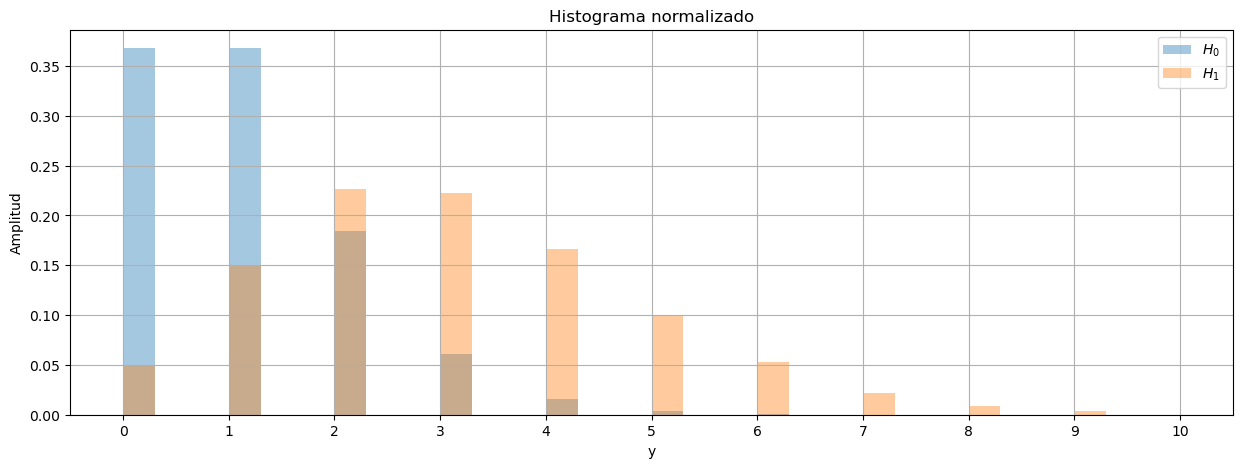

In [18]:
lambda0 = 1
lambda1 = 3
numberOfsamples = 100000

# Analizando la estadística
h0 =  np.random.poisson(lambda0, numberOfsamples)
h1 = np.random.poisson(lambda1, numberOfsamples)

plt.figure(figsize=(15,5))
plt.hist(h0,bins = 10, range = (0,10), density = True , width = 0.3, align='mid', alpha = 0.4, label="$H_0$")
plt.hist(h1, bins = 10 , range = (0,10), density = True , width =0.3, align='mid', alpha = 0.4, label="$H_1$")
plt.xlabel('y')
plt.xticks(range(0, 11))
plt.ylabel('Amplitud')
plt.legend()
plt.title('Histograma normalizado')
plt.grid()
plt.show()

Para calcular la probabilidad de error cuando se utiliza el nivel de decisión del punto anterior, realizamos lo siguiente:

In [19]:
ref = 2.5917 #Nivel de decisión
Pe0 = [1 if h0[i]>=ref else 0 for i in range(len(h0))]
Pe1 = [1 if h1[i]<ref else 0 for i in range(len(h1))]

PET = (sum(Pe0)*0.7 + sum(Pe1)*0.3)/numberOfsamples #ProbabilidadErrorTotal

print("La Probabilidad de Error Total es:", PET)

La Probabilidad de Error Total es: 0.18359


Como podemos ver tomando un nivel de decisión de $2.5917$ el error de que se decida por alguna de las hipotesís y se cometa un error es del $18\% $ aproximadamente.

### Cambiamos el nivel de decisión

Como se mostro en tareas anteriores, para el caso de máxima verosimilitud, teniamos:

$$\frac{3^y}{y!}e^{-3}\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}\frac{1^y}{y!}e^{-1}$$

$$\frac{3^y}{1^y}\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}\frac{e^{-1}}{e^{-3}}$$


$$3^y\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}e^{2}$$

$$log_3 3^y\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}log_3 e^{2}$$

$$y\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}log_3 e^{2}$$

Obtengo:

$$y\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}1.8$$


In [21]:
ref = 1.8 #Nivel de decisión
Pe0 = [1 if h0[i]>=ref else 0 for i in range(len(h0))]
Pe1 = [1 if h1[i]<ref else 0 for i in range(len(h1))]

PET = (sum(Pe0)*0.7 + sum(Pe1)*0.3)/numberOfsamples #ProbabilidadErrorTotal

print("La Probabilidad de Error Total es:", PET)

La Probabilidad de Error Total es: 0.244753


Al compararlo con el resultado anterior vemos un incremento  del error, ahora es del $24\%$ para un nivel de decisión de $1.8$.
Esto se debe a que no estamos conciderando la probabilidad de cada una de las hipotesís, es decir, las tomamos como equiprobables. 